In [24]:
import os
import numpy as np

#visualization
import matplotlib as mtlib
import matplotlib.pyplot as plt
import seaborn as seborn
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #due to kernel errors

In [25]:
#Tensorflow needed imports

import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
#Dataset information

image_folder = os.path.join('datasets', 'face_dataset_train_images')
img_height, img_width = 250, 250 #size of images
num_classes = 2 # number of classes



LOOK THE DATA FOR DEBUGGING PURPOSES

In [27]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)

Found 433 files belonging to 2 classes.


In [28]:
#class check
class_names = dataset.class_names
class_names

['me', 'not_me']

In [29]:
#function to get classname of the image
def get_classname(class_names, mask):
  assert len(class_names) == len(
        mask), "The arrays must be of the same length"

  return class_names[np.array(mask).argmax(axis=0)]

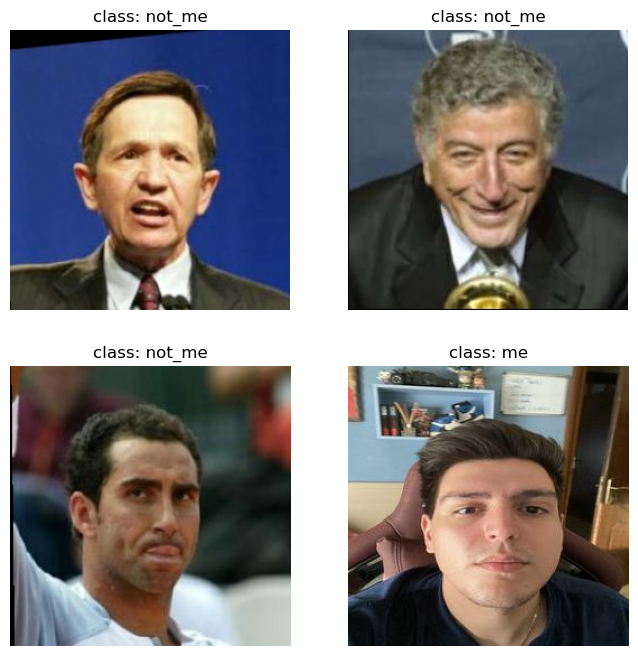

In [30]:
sqrt_img = 2 #images per row /col
#the square root of the total number of images shown
plt.figure(figsize=(8,8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        #grid 'sqrt_image' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("class: {}".format(class_name))
        plt.axis("off")

DATA AUGMENTATION

In [31]:
batch_size = 16

#create data generator based on ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range = (0.7, 1),
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 433 images belonging to 2 classes.


(-0.5, 249.5, 249.5, -0.5)

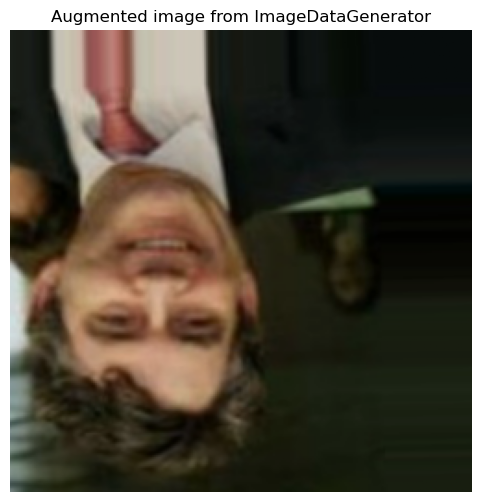

In [32]:
#check next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6,6))
plt.imshow(image[0] / 255) #first image of the batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

Generate n samples for each image

In [33]:
n = 5

aug_image_folder = os.path.join('datasets', 'face_dataset_train_aug_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder) #create folder if doesn't exist
    

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    brightness_range = (0.7, 1),
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode = 'nearest'
)

In [35]:
image_folder_to_generate = os.path.join(image_folder, 'me')
image_folder_to_save = os.path.join(aug_image_folder, 'me')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save) # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate)) # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    #for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height,img_width,3))
    image = keras.preprocessing.image.img_to_array(image) #from image to array 
    #shape from (250,250,3) to (1,250, 250, 3)
    image = np.expand_dims(image, axis=0)
    
    #create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size = 1,
                                           save_to_dir= image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")
    
    #generate n samples
    count = 0
    for image in current_image_gen: #accessing the object saves the image to disk
        count+= 1
        if count == n: # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n,filename))
    i += 1
print("\nTotal number images generated = {}".format(n*total))

Step 1 of 139
	Generate 5 samples for file IMG_9256.JPG
Step 2 of 139
	Generate 5 samples for file IMG_9257.JPG
Step 3 of 139
	Generate 5 samples for file IMG_9258.JPG
Step 4 of 139
	Generate 5 samples for file IMG_9259.JPG
Step 5 of 139
	Generate 5 samples for file IMG_9260.JPG
Step 6 of 139
	Generate 5 samples for file IMG_9261.JPG
Step 7 of 139
	Generate 5 samples for file IMG_9262.JPG
Step 8 of 139
	Generate 5 samples for file IMG_9263.JPG
Step 9 of 139
	Generate 5 samples for file IMG_9264.JPG
Step 10 of 139
	Generate 5 samples for file IMG_9265.JPG
Step 11 of 139
	Generate 5 samples for file IMG_9266.JPG
Step 12 of 139
	Generate 5 samples for file IMG_9267.JPG
Step 13 of 139
	Generate 5 samples for file IMG_9268.JPG
Step 14 of 139
	Generate 5 samples for file IMG_9269.JPG
Step 15 of 139
	Generate 5 samples for file IMG_9270.JPG
Step 16 of 139
	Generate 5 samples for file IMG_9271.JPG
Step 17 of 139
	Generate 5 samples for file IMG_9272.JPG
Step 18 of 139
	Generate 5 samples for f